# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


In [29]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
import pandas as pd
%matplotlib inline

##### 1. What does the data describe?

The data describes SAT scores around the united states.

In [2]:
rows = []
SAT_path = '../assets/sat_scores.csv'   #set path to data
with open(SAT_path, 'r') as f:   #open data as temp varialbe
    reader = csv.reader(f)     # use function csv reader
    for i in reader:          
        rows.append(i)
for i in range(5):
    print rows[i]


['State', 'Rate', 'Verbal', 'Math']
['CT', '82', '509', '510']
['NJ', '81', '499', '513']
['MA', '79', '511', '515']
['NY', '77', '495', '505']


##### 2. Does the data look complete? Are there any obvious issues with the observations?

SAT dataset looks complete

##### 3. Create a data dictionary for the dataset.

In [3]:
header = rows[0]
data = rows[1:]
print header

sat_data = {}

for column_index, column_name in enumerate(header):
    sat_data[column_name] = []     # initiate key with empty list
    #print(sat_data)
    
    for row_index, row in enumerate(data):
        #print row_index
        #print column_index
        sat_data[column_name].append(row[column_index])  
            # access dict key          #append the rows contents to appropriate column in dict

len(sat_data['Math'])   #check to see lengths are correct

['State', 'Rate', 'Verbal', 'Math']


52

## Step 2: Load the data.

##### 4. Load the data into a list of lists


In [4]:
data = []
for col_name in rows[0]:
    data.append(col_name)
    data.append(sat_data[col_name])

##### 5. Print the data

In [5]:
print data

['State', ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate', ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'Verbal', ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566',

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [6]:
labels = []
for item in data:
    
    if type(item) == str:
        labels.append(item)
        data.remove(item)   #remove label name from list
        
print labels
print data


['State', 'Rate', 'Verbal', 'Math']
[['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [7]:
state = sat_data['State']
print state

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All']


##### 8. Print the types of each column

In [8]:
for i in sat_data:
    print sat_data[i]
    print type(sat_data[i][0])

['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514']
<type 'str'>
['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All']
<type 'str'>
['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '4

##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [9]:
#convert to floats

for key in sat_data:   
    #print sales_data[key]
    if key != "State":
        sat_data[key] = map(float, sat_data[key])   # convert list to float

print sat_data
print type(sat_data['Rate'][0])
print len(sat_data['Rate'])

{'Math': [510.0, 513.0, 515.0, 505.0, 516.0, 499.0, 499.0, 506.0, 500.0, 501.0, 499.0, 510.0, 499.0, 489.0, 501.0, 488.0, 474.0, 526.0, 499.0, 527.0, 499.0, 515.0, 510.0, 517.0, 525.0, 515.0, 542.0, 439.0, 539.0, 512.0, 542.0, 553.0, 542.0, 589.0, 550.0, 545.0, 572.0, 589.0, 580.0, 554.0, 568.0, 561.0, 577.0, 562.0, 596.0, 550.0, 570.0, 603.0, 582.0, 599.0, 551.0, 514.0], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': [82.0, 81.0, 79.0, 77.0, 72.0, 71.0, 71.0, 69.0, 69.0, 68.0, 67.0, 65.0, 65.0, 63.0, 60.0, 57.0, 56.0, 55.0, 54.0, 53.0, 53.0, 52.0, 51.0, 51.0, 34.0, 33.0, 31.0, 26.0, 23.0, 18.0, 17.0, 13.0, 13.0, 12.0, 12.0, 11.0, 11.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 5.0, 5.0, 4.0, 4.0, 4.0, 

### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [13]:

math = sat_data['Math']
state = sat_data['State']
rate = sat_data['Rate']
verbal = sat_data['Verbal']

d = {}
for s, r, v, m in zip(state, rate, verbal, math):
    d[s] = [s,r,v,m]
    
print (d)



{'WA': ['WA', 53.0, 527.0, 527.0], 'DE': ['DE', 67.0, 501.0, 499.0], 'DC': ['DC', 56.0, 482.0, 474.0], 'WI': ['WI', 6.0, 584.0, 596.0], 'WV': ['WV', 18.0, 527.0, 512.0], 'HI': ['HI', 52.0, 485.0, 515.0], 'FL': ['FL', 54.0, 498.0, 499.0], 'WY': ['WY', 11.0, 547.0, 545.0], 'NH': ['NH', 72.0, 520.0, 516.0], 'NJ': ['NJ', 81.0, 499.0, 513.0], 'NM': ['NM', 13.0, 551.0, 542.0], 'TX': ['TX', 53.0, 493.0, 499.0], 'LA': ['LA', 7.0, 564.0, 562.0], 'NB': ['NB', 8.0, 562.0, 568.0], 'NC': ['NC', 65.0, 493.0, 499.0], 'ND': ['ND', 4.0, 592.0, 599.0], 'TN': ['TN', 13.0, 562.0, 553.0], 'NY': ['NY', 77.0, 495.0, 505.0], 'PA': ['PA', 71.0, 500.0, 499.0], 'RI': ['RI', 71.0, 501.0, 499.0], 'NV': ['NV', 33.0, 509.0, 515.0], 'VA': ['VA', 68.0, 510.0, 501.0], 'CO': ['CO', 31.0, 539.0, 542.0], 'AK': ['AK', 51.0, 514.0, 510.0], 'AL': ['AL', 9.0, 559.0, 554.0], 'AR': ['AR', 6.0, 562.0, 550.0], 'VT': ['VT', 69.0, 511.0, 506.0], 'IL': ['IL', 12.0, 576.0, 589.0], 'GA': ['GA', 63.0, 491.0, 489.0], 'IN': ['IN', 60.0, 

# 11. Create a dictionary with the values for each of the numeric columns

In [14]:
d_num = {}

d_num['Rate'] = rate
d_num['Verbal'] = verbal
d_num['Math'] = math

print d_num
    

{'Rate': [82.0, 81.0, 79.0, 77.0, 72.0, 71.0, 71.0, 69.0, 69.0, 68.0, 67.0, 65.0, 65.0, 63.0, 60.0, 57.0, 56.0, 55.0, 54.0, 53.0, 53.0, 52.0, 51.0, 51.0, 34.0, 33.0, 31.0, 26.0, 23.0, 18.0, 17.0, 13.0, 13.0, 12.0, 12.0, 11.0, 11.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 5.0, 5.0, 4.0, 4.0, 4.0, 45.0], 'Math': [510.0, 513.0, 515.0, 505.0, 516.0, 499.0, 499.0, 506.0, 500.0, 501.0, 499.0, 510.0, 499.0, 489.0, 501.0, 488.0, 474.0, 526.0, 499.0, 527.0, 499.0, 515.0, 510.0, 517.0, 525.0, 515.0, 542.0, 439.0, 539.0, 512.0, 542.0, 553.0, 542.0, 589.0, 550.0, 545.0, 572.0, 589.0, 580.0, 554.0, 568.0, 561.0, 577.0, 562.0, 596.0, 550.0, 570.0, 603.0, 582.0, 599.0, 551.0, 514.0], 'Verbal': [509.0, 499.0, 511.0, 495.0, 520.0, 501.0, 500.0, 511.0, 506.0, 510.0, 501.0, 508.0, 493.0, 491.0, 499.0, 486.0, 482.0, 526.0, 498.0, 527.0, 493.0, 485.0, 514.0, 498.0, 523.0, 509.0, 539.0, 534.0, 539.0, 527.0, 543.0, 562.0, 551.0, 576.0, 550.0, 547.0, 561.0, 580.0, 577.0, 559.0, 562.0, 567.0, 577.0, 564.0

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [16]:
for col in d_num:
    print col, 'max:', max(d_num[col]), 'min:', min(d_num[col])

 Rate max: 82.0 min: 4.0
Math max: 603.0 min: 439.0
Verbal max: 593.0 min: 482.0


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [ ]:
print "Standard deviations of each column: " , '\n','\n' , SAT.std()

## Step 4: Visualize the data
# http://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline


##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

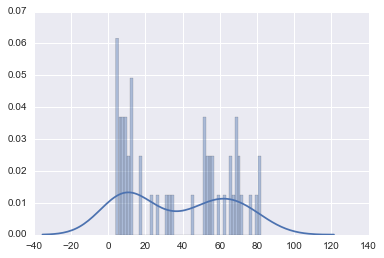

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# plt.hist(sat_data['Rate'],50, normed=1, facecolor='blue', alpha=0.75)

sns.distplot(sat_data['Rate'],50)


##### 15. Plot the Math distribution

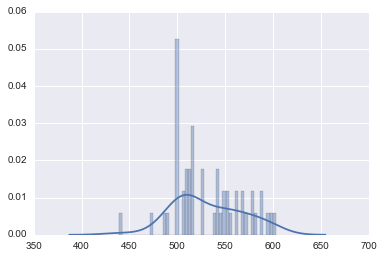

In [22]:
#plt.hist(sat_data['Math'],50, normed=1, facecolor='blue', alpha=0.75)
sns.distplot(sat_data['Math'],50)


##### 16. Plot the Verbal distribution

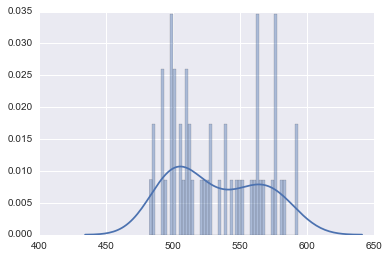

In [23]:
#plt.hist(sat_data['Verbal'],50, normed=1, facecolor='blue', alpha=0.75)
sns.distplot(sat_data['Verbal'],50)

##### 17. What is the typical assumption for data distribution?

##### 18. Does that distribution hold true for our data?

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516


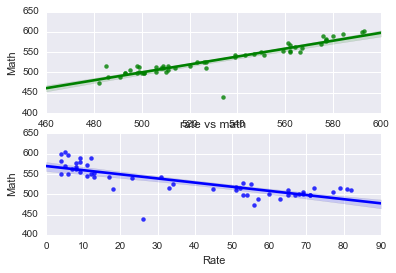

In [37]:
SAT = pd.read_csv('../assets/sat_scores.csv')
print SAT.head()
f, (ax1, ax2) = plt.subplots(2)
sns.regplot('Verbal', 'Math', SAT, color = 'g', ax = ax1)
#sns.plt.title("verbal vs math")
sns.regplot('Rate', 'Math', SAT, color = 'b', ax = ax2)
#sns.plt.title('rate vs math')


##### 20. Are there any interesting relationships to note?

##### 21. Create box plots for each variable. 

In [46]:
sns.boxplot('Verbal', 'Math',SAT)

ValueError: Could not interpret input 'Verbal'

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 